### <i> GeoRiskRegressor: A Multi-Model Approach for Geopolitical Threat Prediction </i>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data_gpr_daily_recent_.csv")

In [3]:
df

,DAY,N10D,GPRD,GPRD_ACT,GPRD_THREAT,date,GPRD_MA30,GPRD_MA7,event,Unnamed: 9,Unnamed: 10
0,19850101,216,230.04,275.20,153.03,1/1/1985,230.04,230.04,NaN,NaN,NaN
1,19850102,315,115.68,146.77,87.44,1/2/1985,172.86,172.86,NaN,NaN,NaN
2,19850103,374,97.43,158.94,29.46,1/3/1985,147.71,147.71,NaN,NaN,NaN
3,19850104,421,157.37,156.88,157.03,1/4/1985,150.13,150.13,NaN,NaN,NaN
4,19850105,285,81.36,92.70,77.32,1/5/1985,136.37,136.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14471,20240815,475,139.48,97.33,162.37,8/15/2024,130.32,143.15,NaN,NaN,NaN
14472,20240816,516,134.81,192.00,138.79,8/16/2024,131.29,139.62,NaN,NaN,NaN
14473,20240817,447,148.21,221.64,110.92,8/17/2024,131.75,139.79,NaN,NaN,NaN
14474,20240818,376,61.67,105.39,14.65,8/18/2024,129.21,138.53,NaN,NaN,NaN


### <i> Dataset OVerview </i>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14476 entries, 0 to 14475
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DAY          14476 non-null  int64  
 1   N10D         14476 non-null  int64  
 2   GPRD         14476 non-null  object 
 3   GPRD_ACT     14476 non-null  object 
 4   GPRD_THREAT  14476 non-null  float64
 5   date         14476 non-null  object 
 6   GPRD_MA30    14476 non-null  float64
 7   GPRD_MA7     14476 non-null  float64
 8   event        11 non-null     object 
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.2+ MB


In [5]:
df.describe()

,DAY,N10D,GPRD_THREAT,GPRD_MA30,GPRD_MA7,Unnamed: 9,Unnamed: 10
count,1.447600e+04,14476.000000,14476.000000,14476.000000,14476.000000,0.0,0.0
mean,2.004387e+07,809.691282,103.605893,101.283165,101.293408,NaN,NaN
std,1.144240e+05,238.278528,61.779672,46.360260,50.846058,NaN,NaN
min,1.985010e+07,151.000000,0.000000,39.110000,33.550000,NaN,NaN
25%,1.994113e+07,628.000000,63.970000,79.270000,75.690000,NaN,NaN
50%,2.004103e+07,820.000000,91.220000,92.640000,91.150000,NaN,NaN
75%,2.014092e+07,991.000000,128.495000,109.780000,113.545000,NaN,NaN
max,2.024082e+07,1416.000000,809.490000,681.690000,810.670000,NaN,NaN


### <i> Data Preprocessing </i>

In [6]:
# Drop unimportant columns: 'Unnamed: 9', 'Unnamed: 10', and 'event' due to lack of useful data
df.drop(['Unnamed: 9', 'Unnamed: 10', 'event'], axis=1, inplace=True)

# Convert 'date' column from object to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any remaining missing values in the dataset and handle them (if necessary)
missing_values = df.isnull().sum()
print("\nMissing values per column after dropping unimportant columns:")
print(missing_values)



Missing values per column after dropping unimportant columns:
DAY            0
N10D           0
GPRD           0
GPRD_ACT       0
GPRD_THREAT    0
date           0
GPRD_MA30      0
GPRD_MA7       0
dtype: int64


In [7]:
# Option 1: Drop rows with missing values (if there are only a few)
df.dropna(inplace=True)


In [8]:
# Display the cleaned dataset
print("\nCleaned Dataset Info:")
print(df.info())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14476 entries, 0 to 14475
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DAY          14476 non-null  int64         
 1   N10D         14476 non-null  int64         
 2   GPRD         14476 non-null  object        
 3   GPRD_ACT     14476 non-null  object        
 4   GPRD_THREAT  14476 non-null  float64       
 5   date         14476 non-null  datetime64[ns]
 6   GPRD_MA30    14476 non-null  float64       
 7   GPRD_MA7     14476 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 904.9+ KB
None


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### <i> Expolatory Data Analysis ( EDA ) </i>

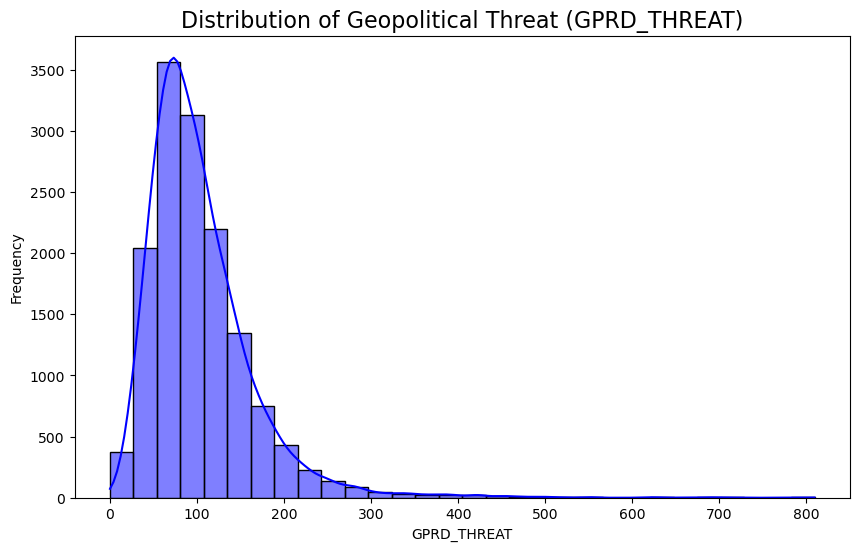

In [10]:
# Visualize the distribution of the GPRD_THREAT column
plt.figure(figsize=(10, 6))
sns.histplot(df['GPRD_THREAT'], bins=30, kde=True, color='blue')
plt.title('Distribution of Geopolitical Threat (GPRD_THREAT)', fontsize=16)
plt.xlabel('GPRD_THREAT')
plt.ylabel('Frequency')
plt.show()

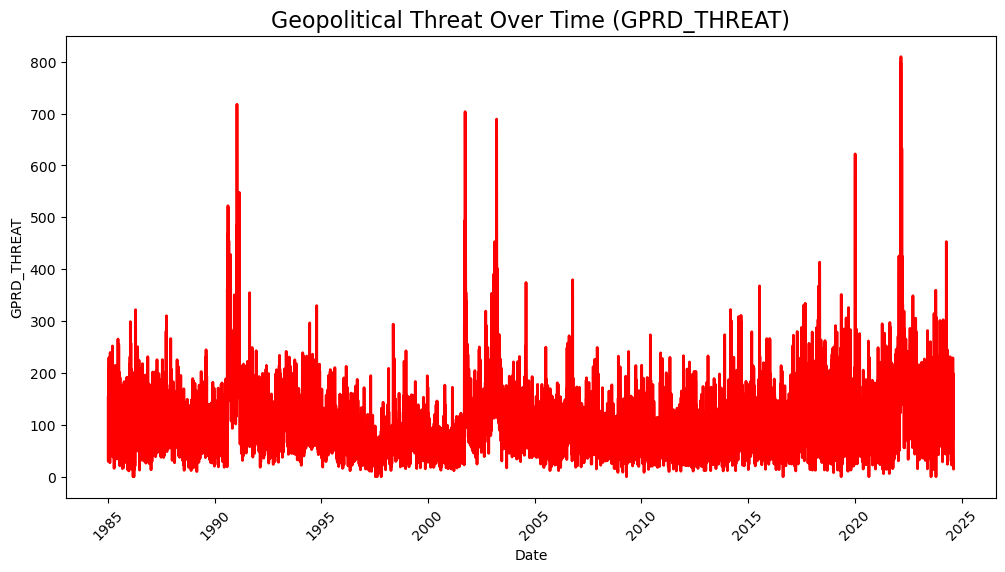

In [11]:
# Time Series plot for GPRD_THREAT
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['GPRD_THREAT'], color='red', linewidth=2)
plt.title('Geopolitical Threat Over Time (GPRD_THREAT)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('GPRD_THREAT')
plt.xticks(rotation=45)
plt.show()

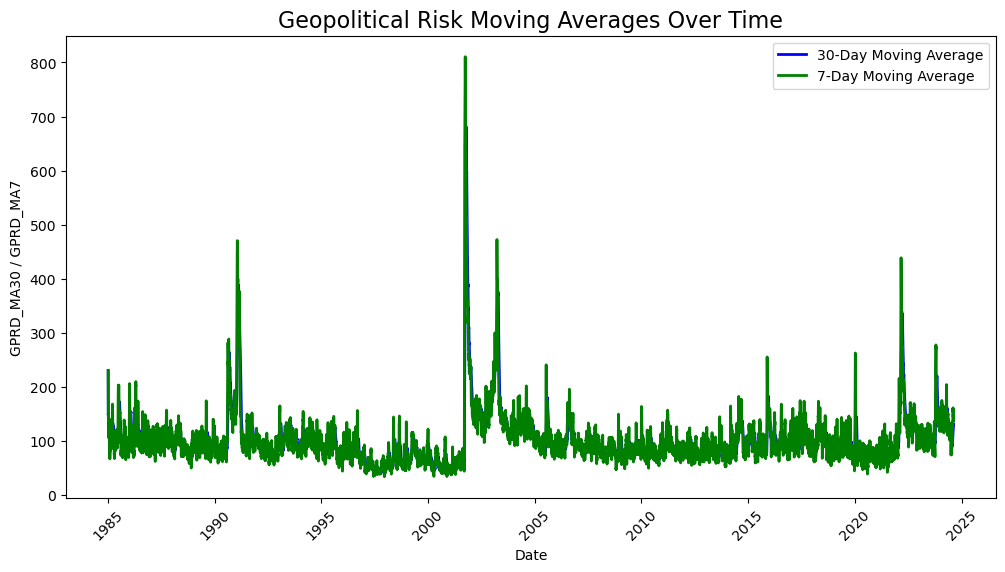

In [12]:
# Plot 30-day and 7-day moving averages (GPRD_MA30 and GPRD_MA7) over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['GPRD_MA30'], label='30-Day Moving Average', color='blue', linewidth=2)
plt.plot(df['date'], df['GPRD_MA7'], label='7-Day Moving Average', color='green', linewidth=2)
plt.title('Geopolitical Risk Moving Averages Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('GPRD_MA30 / GPRD_MA7')
plt.legend()
plt.xticks(rotation=45)
plt.show()


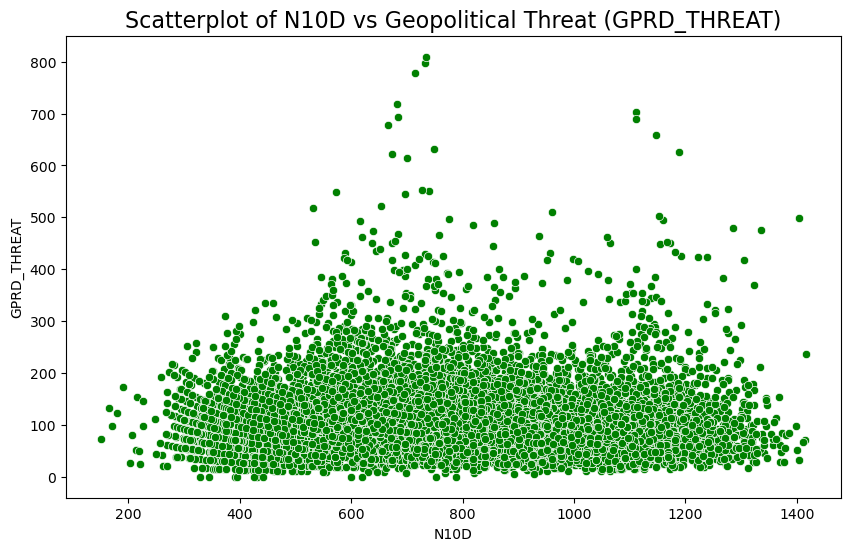

In [13]:
# Scatter plot of N10D vs GPRD_THREAT to analyze their relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['N10D'], y=df['GPRD_THREAT'], color='green')
plt.title('Scatterplot of N10D vs Geopolitical Threat (GPRD_THREAT)', fontsize=16)
plt.xlabel('N10D')
plt.ylabel('GPRD_THREAT')
plt.show()

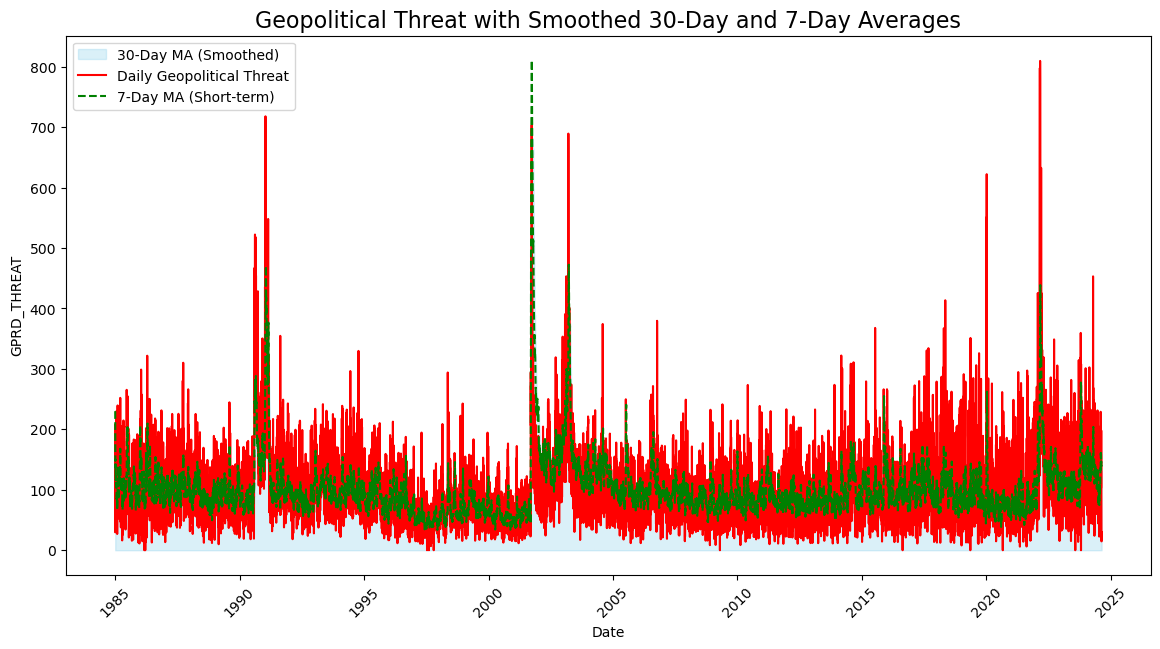

In [14]:
plt.figure(figsize=(14, 7))

# Area plot for GPRD_MA30 to show long-term risk trends
plt.fill_between(df['date'], df['GPRD_MA30'], color='skyblue', alpha=0.3, label='30-Day MA (Smoothed)')

# Line plot for GPRD_THREAT to highlight daily fluctuations
plt.plot(df['date'], df['GPRD_THREAT'], color='red', label='Daily Geopolitical Threat')

# Line plot for GPRD_MA7 to show short-term risk trends
plt.plot(df['date'], df['GPRD_MA7'], color='green', label='7-Day MA (Short-term)', linestyle='--')

plt.title('Geopolitical Threat with Smoothed 30-Day and 7-Day Averages', fontsize=16)
plt.xlabel('Date')
plt.ylabel('GPRD_THREAT')
plt.legend()
plt.xticks(rotation=45)
plt.show()


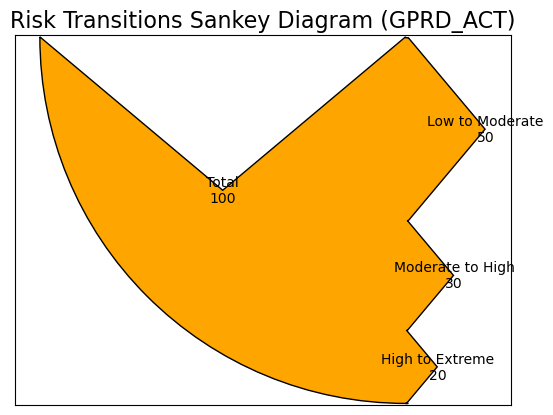

In [15]:
from matplotlib.sankey import Sankey

# Example transition data: replace with actual values from 'GPRD_ACT'
transitions = {'Low Risk': 100, 'Moderate Risk': 50, 'High Risk': 30, 'Extreme Risk': 20}

# Create Sankey diagram for risk transitions
sankey = Sankey(flows=[100, -50, -30, -20], labels=['Total', 'Low to Moderate', 'Moderate to High', 'High to Extreme'], orientations=[1, 0, 0, 0], facecolor="orange")
sankey.finish()

plt.title('Risk Transitions Sankey Diagram (GPRD_ACT)', fontsize=16)
plt.show()


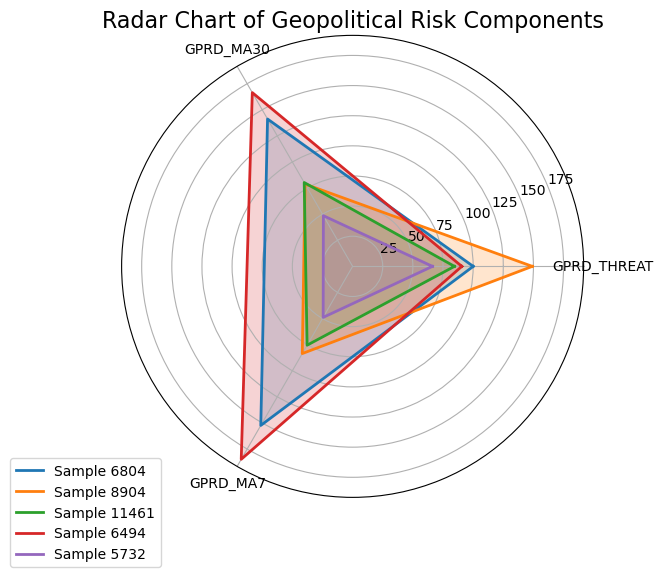

In [16]:
from math import pi

# Select specific columns for radar chart (assuming regions or risk components)
df_radar = df[['GPRD_THREAT', 'GPRD_MA30', 'GPRD_MA7']].sample(5)  # Example with 5 samples

# Define number of variables and angles
categories = ['GPRD_THREAT', 'GPRD_MA30', 'GPRD_MA7']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot radar chart
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

# First make the plot in one go
for i, row in df_radar.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Sample {i}')
    ax.fill(angles, values, alpha=0.2)

# Add labels and title
plt.xticks(angles[:-1], categories)
plt.title('Radar Chart of Geopolitical Risk Components', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


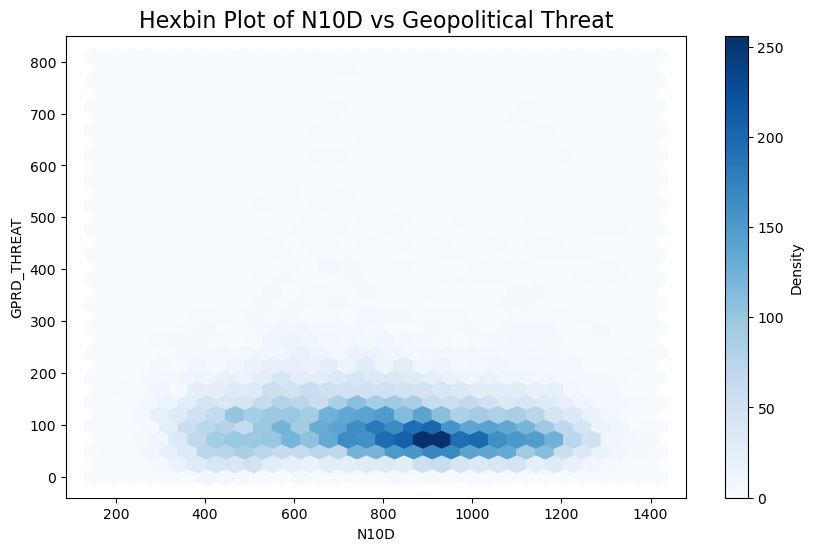

In [17]:
plt.figure(figsize=(10, 6))

# Hexbin plot of N10D vs GPRD_THREAT
plt.hexbin(df['N10D'], df['GPRD_THREAT'], gridsize=30, cmap='Blues')
plt.colorbar(label='Density')

plt.title('Hexbin Plot of N10D vs Geopolitical Threat', fontsize=16)
plt.xlabel('N10D')
plt.ylabel('GPRD_THREAT')
plt.show()


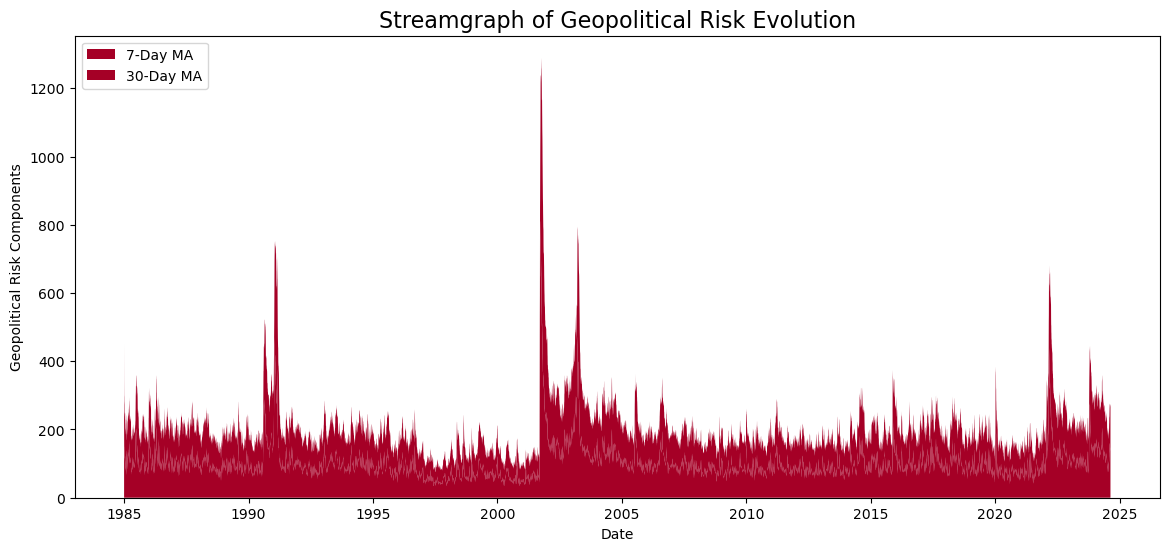

In [18]:
import streamlit as st
import matplotlib.cm as cm
import numpy as np

# Streamgraph-style plot
plt.figure(figsize=(14, 6))
colors = cm.RdYlGn(np.linspace(0, 1, len(df['GPRD_THREAT'])))

# Stackplot of GPRD_THREAT components over time
plt.stackplot(df['date'], df['GPRD_MA7'], df['GPRD_MA30'], colors=colors, labels=['7-Day MA', '30-Day MA'])
plt.title('Streamgraph of Geopolitical Risk Evolution', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Geopolitical Risk Components')
plt.legend(loc='upper left')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [20]:
# Convert 'GPRD' and 'GPRD_ACT' to numerical using Label Encoding
label_encoder = LabelEncoder()
df['GPRD'] = label_encoder.fit_transform(df['GPRD'])
df['GPRD_ACT'] = label_encoder.fit_transform(df['GPRD_ACT'])

# Defining features (X) and target (y)
X = df.drop(['GPRD_THREAT', 'date'], axis=1)  # Remove 'date' if not needed
y = df['GPRD_THREAT']


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### <i> Linear Regression </i>

In [22]:
### 1. Linear Regression Model ###

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")

Linear Regression - MSE: 2107.098384696403, R2: 0.4312590547394144


### <i> Random Forest Regression </i>

In [23]:
### 2. Random Forest Regressor ###

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")

Random Forest - MSE: 455.42277729508174, R2: 0.8770738078804393


### <i> XGBoost Regressor </i>

In [24]:
### 3. XGBoost Regressor ###

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f"XGBoost - MSE: {xgb_mse}, R2: {xgb_r2}")

XGBoost - MSE: 439.1888548099349, R2: 0.8814556139159557


### <i> Comparison Of All Models </i>

In [25]:
## Comparison of Models ###

print("\nModel Comparison:")
print(f"Linear Regression: MSE={lr_mse}, R2={lr_r2}")
print(f"Random Forest: MSE={rf_mse}, R2={rf_r2}")
print(f"XGBoost: MSE={xgb_mse}, R2={xgb_r2}")


Model Comparison:
Linear Regression: MSE=2107.098384696403, R2=0.4312590547394144
Random Forest: MSE=455.42277729508174, R2=0.8770738078804393
XGBoost: MSE=439.1888548099349, R2=0.8814556139159557
